In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test  = tf.keras.utils.normalize(x_test, axis=1)


In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(x_train,y_train, epochs = 3)
model.save('hand.model')

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541 - accuracy: 0.9828
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0410 - accuracy: 0.9874
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0317 - accuracy: 0.9897
INFO:tensorflow:Assets written to: hand.model\assets


1/1 [==============================] - 0s 46ms/step
This digit is probably a 5


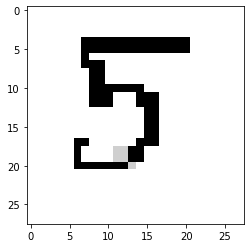

1/1 [==============================] - 0s 14ms/step
This digit is probably a 3


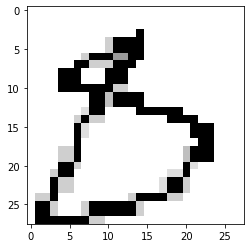

1/1 [==============================] - 0s 16ms/step
This digit is probably a 1


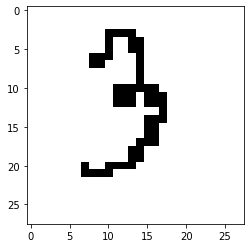

1/1 [==============================] - 0s 17ms/step
This digit is probably a 4


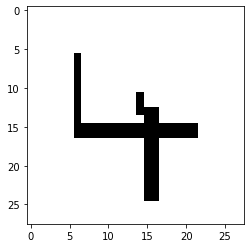

1/1 [==============================] - 0s 15ms/step
This digit is probably a 3


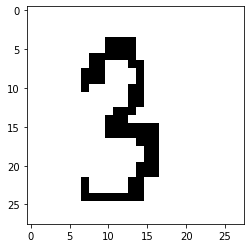

1/1 [==============================] - 0s 13ms/step
This digit is probably a 1


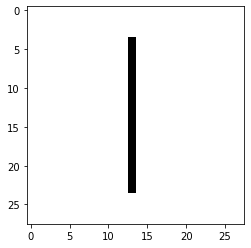

1/1 [==============================] - 0s 13ms/step
This digit is probably a 6


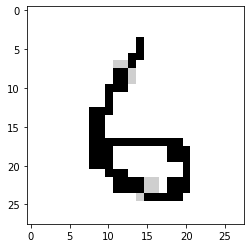

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9908
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0205 - accuracy: 0.9930
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0181 - accuracy: 0.9938
INFO:tensorflow:Assets written to: hand.model\assets


In [23]:
model = tf.keras.models.load_model('hand.model')
image_number = 1
while os.path.isfile(f"image/digit{image_number}.png"):
    try:
        img = cv2.imread(f"image/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("error")
    finally:
        image_number += 1
model.fit(x_train,y_train, epochs = 3)
model.save('hand.model')